In [1]:
#Imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

#Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset

advertising = pd.read_csv("advertising.csv")

In [4]:
advertising

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
#peeking the data
advertising.shape

(200, 5)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
advertising.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


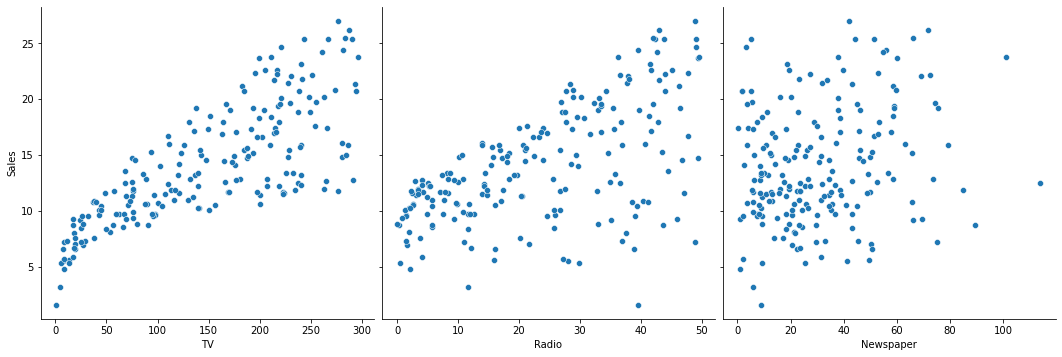

In [9]:
#visualization
sns.pairplot(advertising,x_vars = ['TV','Radio', 'Newspaper'],y_vars = 'Sales',kind = 'scatter',size = 5)

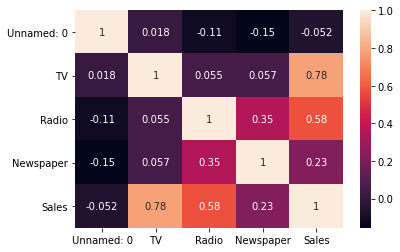

In [10]:
#checking co-relation
sns.heatmap(advertising.corr(),annot = True)
plt.show()

In [13]:
#defining x and y variables(y = target)
x = advertising['TV']
y = advertising['Sales']

In [17]:
#Splitting the data into Train and Test (with split ratio = 80-20)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state = 5)

In [18]:
x_train

159    131.7
62     239.3
166     17.9
45     175.1
23     228.3
       ...  
73     129.4
144     96.2
118    125.7
189     18.7
99     135.2
Name: TV, Length: 160, dtype: float64

In [19]:
x_test.head()

119     19.4
77     120.5
148     38.0
149     44.7
154    187.8
Name: TV, dtype: float64

In [23]:
import statsmodels.api as sm

In [24]:
#Adding a constant (to get an intercept)
x_train_sm = sm.add_constant(x_train)

In [25]:
#Fitting the regression model using OLS (of SM)

lr = sm.OLS(y_train,x_train_sm).fit()


In [26]:
lr.params

const    6.894375
TV       0.048660
dtype: float64

In [28]:
 lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     275.5
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           1.87e-36
Time:                        01:08:23   Log-Likelihood:                -411.30
No. Observations:                 160   AIC:                             826.6
Df Residuals:                     158   BIC:                             832.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8944      0.490     14.078      0.000       5.927       7.862
TV             0.0487      0.003     16.597      0.000       0.043       0.054
==============================================================================
Omnibus:                        0.157   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.925   Jarque-Bera (JB):                0.220
Skew:                          -0.073   Prob(JB):                        0.896
Kurtosis:                       2.892   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""